In [101]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
from glob import glob
from skimage.io import imread
from PIL import Image
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.metrics import confusion_matrix
import itertools


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#resized all the images 
from PIL import Image
import os, sys
import glob

root_dir = 'photos'

for filename in glob.iglob(root_dir + '/*.jpg'):
    im = Image.open(filename)
    imResize = im.resize((125,125), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [0]:
# Here's our 6 categories that we have to classify.
class_names = ['inside', 'outside', 'food', 'drink', 'menu']
class_names_label = { 0:'drink',
                      1: 'food',
                      2: 'inside',
                      3: 'menu',
                      4: 'outside',
                    }
nb_classes = 5

In [0]:
#reading json files
photos_json = 'photo.json'
df = pd.read_json(photos_json, lines=True)

In [262]:
df.head(3)

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food


In [263]:
# shape of the dataframe
df.label.unique()

array(['inside', 'food', 'outside', 'drink', 'menu'], dtype=object)

In [264]:
df.head(3)

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food


In [265]:
# creating dictionary with key as photo_id and value as image path
import glob
img_dir = 'photos' #Directory of all images 

data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
print(files)
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x 
                     for x in glob.glob(data_path)}

['photos/__CO6Mqzivn5NYAV0Obk2Q.jpg', 'photos/_197e1nbBA0T3npYD-xj6w.jpg', 'photos/_9_xi4_OgAd3L-3XEveyvg.jpg', 'photos/_5naIAC1PnAT8K5zaBlY3g.jpg', 'photos/_4Ay9cx9Ll-m7cqz3iQoRA.jpg', 'photos/_45IcOXR5KmbDhY4vxK2Ug.jpg', 'photos/_3iU6bIt2PFSwOA-wvF5ng.jpg', 'photos/_-PelXZO3emAkCD0qNE6Kg.jpg', 'photos/_44YC4_ZboGPfBp2vaEkEA.jpg', 'photos/_8Rgz5SD0jas7qb2B3-2TQ.jpg', 'photos/_44Gex7j1Xxwm0ZBi3toYw.jpg', 'photos/_6X-L2IqaSoyiSqwpXGz4Q.jpg', 'photos/__-_xGdkEiqko_xpgxRAZQ.jpg', 'photos/_3ElYF1ztHfqFm1Mgc881g.jpg', 'photos/_79C53cwxMjz-i-z54Q-_w.jpg', 'photos/__AYPhnXaA1BXcKWeqwQRg.jpg', 'photos/_1Bjq0AwnWYu5-U-MmNFow.jpg', 'photos/_0MGQwk0O0WZ7cpG_vshXw.jpg', 'photos/_1wkCsA3og-iWPA0PD3z_A.jpg', 'photos/_caT0YI78xWSddHp3jtqXA.jpg', 'photos/_5174rzTKmxG0Y6mgFHaig.jpg', 'photos/_bhfkvAAs-0UnZ1j9RkMtw.jpg', 'photos/Ssp7R-N37nxiB-C5fIPvqg.jpg', 'photos/_CuJ8FzazO37zcY8ZL5-2w.jpg', 'photos/_caXzVXIcmYzWLfF2P3okg.jpg', 'photos/_c6w8xnrImKWaq96wDldzg.jpg', 'photos/_D2-FNuiPk2tegb4avud_g.jpg', 

In [0]:
#converting labels to categorical variables
df['class_names_label'] = pd.Categorical(df['label']).codes

In [310]:
df.head(3)

,caption,photo_id,business_id,label,class_names_label,path,image
585,from the Pomegranate Restaurant website,_1af4uPGQTidhJ3wCtOg7g,zrYpLdnGKA_EmOhgRCy_vg,inside,2,photos/_1af4uPGQTidhJ3wCtOg7g.jpg,"[[[138, 103, 99], [139, 104, 100], [142, 107, ..."
603,Happy Hour,_71mpwyVhl8lQLpbNGW9-g,rW5N-fiNhqb-fR3bGqyPdg,inside,2,photos/_71mpwyVhl8lQLpbNGW9-g.jpg,"[[[49, 72, 46], [49, 72, 46], [50, 74, 48], [5..."
791,,_5WmZElVXU9NDphX-DbaEQ,qcWaROXNmCd3JmOb7H78vg,outside,4,photos/_5WmZElVXU9NDphX-DbaEQ.jpg,"[[[1, 0, 0], [9, 7, 8], [21, 20, 18], [27, 26,..."


In [0]:
df['path'] = df['photo_id'].map(imageid_path_dict.get)

In [313]:
print(df.dtypes)

caption              object
photo_id             object
business_id          object
label                object
class_names_label      int8
path                 object
image                object
dtype: object


In [0]:
df = df.dropna()

In [0]:
# getting an image from the path
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))

In [271]:
df.head(3)

,caption,photo_id,business_id,label,class_names_label,path,image
585,from the Pomegranate Restaurant website,_1af4uPGQTidhJ3wCtOg7g,zrYpLdnGKA_EmOhgRCy_vg,inside,2,photos/_1af4uPGQTidhJ3wCtOg7g.jpg,"[[[138, 103, 99], [139, 104, 100], [142, 107, ..."
603,Happy Hour,_71mpwyVhl8lQLpbNGW9-g,rW5N-fiNhqb-fR3bGqyPdg,inside,2,photos/_71mpwyVhl8lQLpbNGW9-g.jpg,"[[[49, 72, 46], [49, 72, 46], [50, 74, 48], [5..."
791,,_5WmZElVXU9NDphX-DbaEQ,qcWaROXNmCd3JmOb7H78vg,outside,4,photos/_5WmZElVXU9NDphX-DbaEQ.jpg,"[[[1, 0, 0], [9, 7, 8], [21, 20, 18], [27, 26,..."


In [272]:
# see the image size distribution
df['image'].map(lambda x: x.shape).value_counts()

(125, 125, 3)    1000
Name: image, dtype: int64

In [0]:
x=df.drop(columns=['class_names_label'],axis=1)
y=df['class_names_label']

In [0]:
x_train_o, x_test_o, y_train_o, y_test_o  = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [327]:
import keras

from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding

y_train = to_categorical(y_train_o, num_classes = 5)
y_test = to_categorical(y_test_o, num_classes = 5)
print(np.shape(x_test))
print(np.shape(y_test))

(200, 125, 125, 3)
(200, 5)


In [0]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

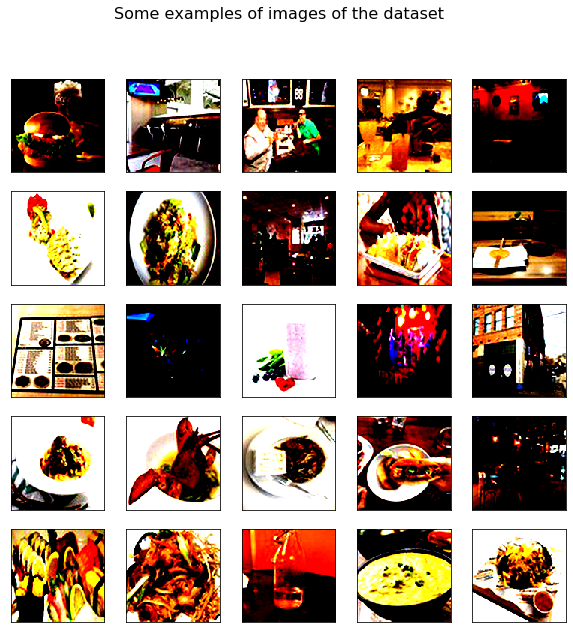

In [329]:
#Displaying some of the images from the dataset
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.xlabel(class_names[y_train[i]])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [0]:
x_train = x_train.reshape(x_train.shape[0], *(125, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(125, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(125, 125, 3))

In [232]:
x_train.shape

(720, 125, 125, 3)

**Defining Model Structure:**

Creating a simple architecture with 2 convolutional layers, one dense hidden layer and an output layer.

In [233]:
input_shape = (125, 125, 3)
num_classes = 5

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 125, 125, 32)      896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 64)       

In [0]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [235]:

# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Comiling the model we’ve created.
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Training the model
epochs = 50 
batch_size = 10
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                             )

Epoch 1/50
72/72 [==============================] - 7s 96ms/step - loss: 1.1273 - acc: 0.6264 - val_loss: 0.8890 - val_acc: 0.6750
Epoch 2/50
72/72 [==============================] - 4s 60ms/step - loss: 0.9550 - acc: 0.6611 - val_loss: 0.9604 - val_acc: 0.7000
Epoch 3/50
72/72 [==============================] - 4s 62ms/step - loss: 0.9147 - acc: 0.6889 - val_loss: 0.9027 - val_acc: 0.7375
Epoch 4/50
72/72 [==============================] - 5s 63ms/step - loss: 0.9527 - acc: 0.6903 - val_loss: 0.8897 - val_acc: 0.7250
Epoch 5/50
72/72 [==============================] - 5s 64ms/step - loss: 0.8281 - acc: 0.7333 - val_loss: 0.7602 - val_acc: 0.7625
Epoch 6/50
72/72 [==============================] - 5s 63ms/step - loss: 0.8003 - acc: 0.7111 - val_loss: 0.6973 - val_acc: 0.7875
Epoch 7/50
72/72 [==============================] - 5s 63ms/step - loss: 0.7837 - acc: 0.7389 - val_loss: 0.6738 - val_acc: 0.7625
Epoch 8/50
72/72 [==============================] - 5s 63ms/step - loss: 0.7442 - a

In [236]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("initial_model_50.h5")

80/80 [==============================] - 0s 3ms/step
Validation: accuracy = 0.787500  ;  loss_v = 0.726898
Test: accuracy = 0.755000  ;  loss = 0.928265


In [0]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

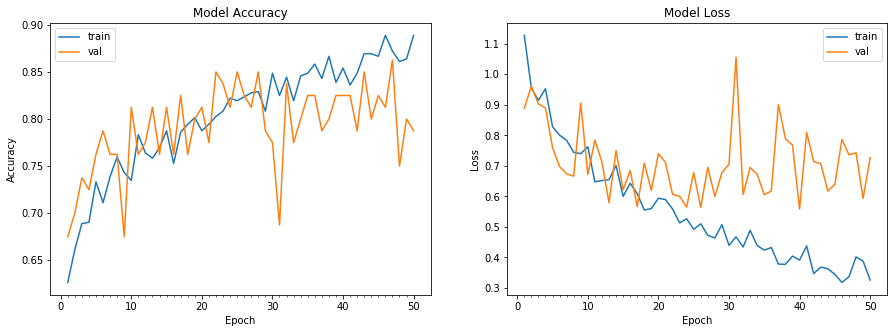

In [238]:
plot_model_history(history)

In [309]:
index = np.random.randint(x_test.shape[0]) # We choose a random index

img = (np.expand_dims(x_test[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[y_test[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

TypeError: ignored